In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
df = pd.read_csv('kickstarter201801.csv')

In [2]:
df['passfail'] = df['state']
d = {'failed': 0, 'successful': 1, 'canceled': '', 'live': '', 'undefined': '', 'suspended': ''}
df['passfail'] = df['passfail'].replace(d)

In [3]:
df['fakeclean'] = df['launched'].str.split(" ", n = 1, expand = True)[0]
df['datesclean'] = df['fakeclean'].str.split("-", n = 1, expand = True)[1]

In [4]:
df10 = df[['datesclean', 'passfail']]

In [5]:
df10 = df10[df10.passfail != '']

In [6]:
counts = df10.groupby("datesclean")["passfail"].sum()

In [7]:
totals = df10.groupby("datesclean")["passfail"].count()

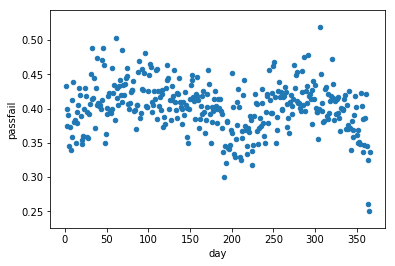

In [22]:
result = (counts / totals).to_frame()
result['datesclean'] = df10['datesclean'].unique()
result['day'] = [x for x in range(1, 367)]
result.plot(kind='scatter', x='day', y='passfail')

In [25]:
print(result['day'].shape)
print(result['passfail'].shape)

(366,)
(366,)


In [30]:
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(np.array(result['day']).reshape(-1, 1), result['passfail'])
x_reg = np.arange(367)
y_reg = model.predict(x_reg.reshape(-1, 1))

plt.show(x_reg, y_reg)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()